# Histograms, Binnings, and Density
A simple histogram can be a great first step in understanding a dataset.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

(array([  5.,  29.,  79., 154., 225., 234., 170.,  73.,  20.,  11.]),
 array([-3.1441186 , -2.51951579, -1.89491299, -1.27031018, -0.64570737,
        -0.02110457,  0.60349824,  1.22810105,  1.85270385,  2.47730666,
         3.10190947]),
 <a list of 10 Patch objects>)

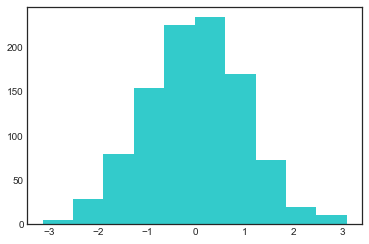

In [2]:
data = np.random.randn(1000)
plt.hist(data, color='c', alpha=0.8)

The <b>hist()</b> function has many options to tune both the calculation and the display;

(array([0.0096061 , 0.00480305, 0.0096061 , 0.04322747, 0.04322747,
        0.05283358, 0.08165189, 0.12007631, 0.17771294, 0.17771294,
        0.25936483, 0.3025923 , 0.28338009, 0.43707777, 0.36022893,
        0.44188082, 0.33621367, 0.34581977, 0.29778925, 0.27377399,
        0.24495567, 0.2113343 , 0.07684884, 0.06243968, 0.07684884,
        0.01440916, 0.00480305, 0.01921221, 0.01440916, 0.01921221]),
 array([-3.1441186 , -2.93591767, -2.72771673, -2.51951579, -2.31131486,
        -2.10311392, -1.89491299, -1.68671205, -1.47851112, -1.27031018,
        -1.06210925, -0.85390831, -0.64570737, -0.43750644, -0.2293055 ,
        -0.02110457,  0.18709637,  0.3952973 ,  0.60349824,  0.81169918,
         1.01990011,  1.22810105,  1.43630198,  1.64450292,  1.85270385,
         2.06090479,  2.26910573,  2.47730666,  2.6855076 ,  2.89370853,
         3.10190947]),
 <a list of 1 Patch objects>)

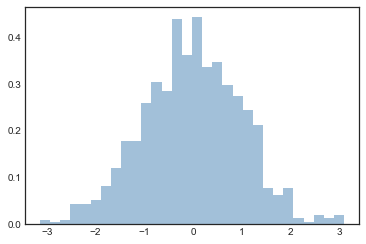

In [3]:
plt.hist(data, bins=30, normed=True, alpha = 0.5, histtype='stepfilled', color='steelblue', edgecolor='none')

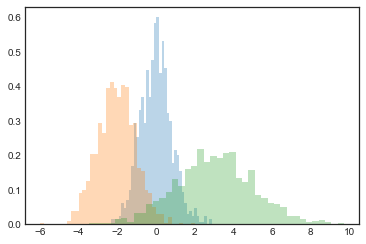

In [4]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

If you would like to simply compute the histogram (that is, count the number of
points in a given bin) and not display it, the <b>np.histogram()</b> function is available:

In [5]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 34 233 459 243  31]


## Two-Dimensional Histograms and Binnings
Just as we create histograms in one dimension by dividing the number line into bins,
we can also create histograms in two dimensions by dividing points among two-dimensional
bins. We’ll take a brief look at several ways to do this here. We’ll start by
defining some data—an x and y array drawn from a<b> multivariate Gaussian
distribution</b>:

In [6]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### plt.hist2d: Two-dimensional histogram
One straightforward way to plot a two-dimensional histogram is to use Matplotlib’s
<b>plt.hist2d</b> function

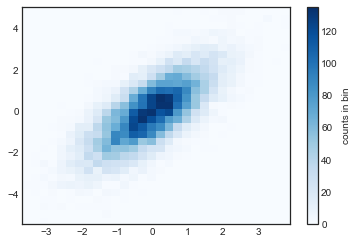

In [8]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

### plt.hexbin: Hexagonal binnings
The two-dimensional histogram creates a tessellation of squares across the axes.
Another natural shape for such a tessellation is the regular hexagon. For this purpose,
Matplotlib provides the <b>plt.hexbin</b> routine, which represents a two-dimensional
dataset binned within a grid of hexagons

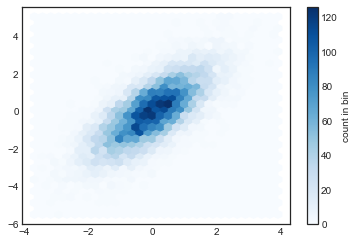

In [14]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

<b>plt.hexbin </b>has a number of interesting options, including the ability to specify
weights for each point, and to change the output in each bin to any NumPy aggregate
(mean of weights, standard deviation of weights, etc.).

## Kernel density estimation
Another common method of evaluating densities in multiple dimensions is <b>kernel
density estimation </b>(KDE). KDE can be
thought of as a way to “smear out” the points in space and add up the result to obtain
a smooth function. One extremely quick and simple KDE implementation exists in
the <b>scipy.stats</b> package. Here is a quick example of using the KDE on this data:

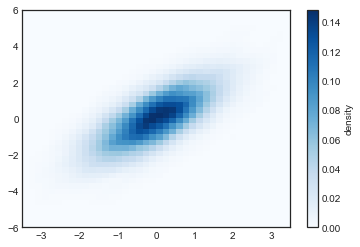

In [15]:
from scipy.stats import gaussian_kde
# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)
# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
origin='lower', aspect='auto', extent=[-3.5, 3.5, -6, 6], cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

KDE has a smoothing length that effectively slides the knob between detail and
smoothness (one example of the ubiquitous bias–variance trade-off). The literature
on choosing an appropriate smoothing length is vast: <b>gaussian_kde</b> uses a rule of
thumb to attempt to find a nearly optimal smoothing length for the input data.

Other KDE implementations are available within the<b> SciPy</b> ecosystem, each with its
own various strengths and weaknesses; see, for example, <b>sklearn.neighbors.KernelDensity</b> and<b> statsmodels.nonparametric.kernel_density.KDEMultivariate</b>. For
visualizations based on KDE, using Matplotlib tends to be overly verbose.